In [7]:
import qiskit
qiskit.__version__



'1.2.4'

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector



In [9]:

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
# qc.draw(output='mpl')

state = Statevector(qc)
state.draw('latex')

<IPython.core.display.Latex object>

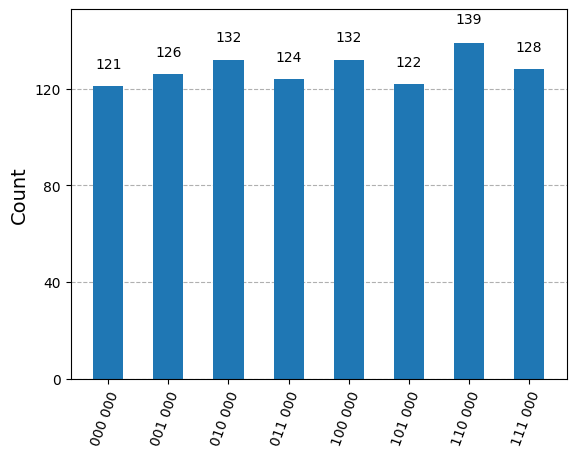

In [31]:
cluster3 = QuantumCircuit(3, 3)

# trying to connect every qubit with other two qubit
#3 qubit cluster state 

for i in range(3):
    cluster3.h(i)

for j in range(2):
    cluster3.cz(j, 2)
# 

cluster3.measure_all()
sim = Aer.get_backend('aer_simulator')
result = sim.run(cluster3).result()
counts = result.get_counts()

plot_histogram(counts)

# cluster3.draw(output='mpl')


In [28]:
state = Statevector(cluster3)
state.draw('latex')

<IPython.core.display.Latex object>

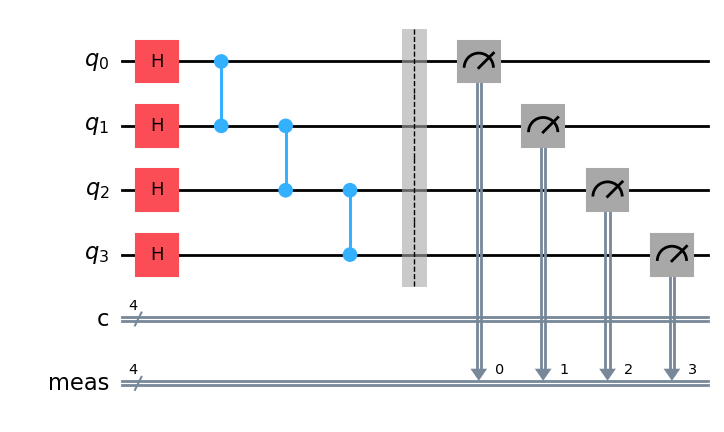

In [11]:
cluster4 = QuantumCircuit(4,4)

for i in range(4):
    cluster4.h(i)
for i in range(3):
    cluster4.cz(i, i+1)
    
cluster4.measure_all()

sim = Aer.get_backend('aer_simulator')
# result = sim.run(cluster4).result()
# counts = result.get_counts()

# plot_histogram(counts)
cluster4.draw(output='mpl')

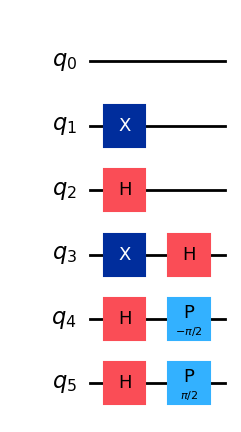

In [12]:
qc = QuantumCircuit(6)

#nothing on the 0 qubit

# qubit in vertical state
qc.x(1)

# diagonal
qc.h(2)

# anti diagonal
qc.x(3)
qc.h(3)

# right circular
qc.h(4)
qc.p(-np.pi/2, 4)

#left circular
qc.h(5)
qc.p(np.pi/2, 5)

# qc.measure_all()
qc.draw(output='mpl')

## GHZ state

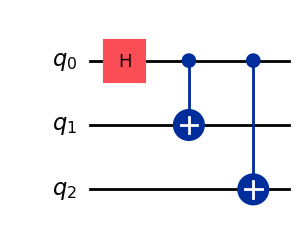

In [35]:
ghz = QuantumCircuit(3)

ghz.h(0)
# ghz.p(np.pi/2, 0)
ghz.cx(0,1)
ghz.cx(0,2)

ghz.draw(output='mpl')

In [36]:
state = Statevector(ghz)
state.draw('latex')

<IPython.core.display.Latex object>

In [3]:
qc1 = QuantumCircuit(1,1)
# qc1.h(0)
# qc.x(0)
qc1.h(0)
qc1.p(-np.pi/2, 0)
# qc1.draw('mpl')
qc1.measure_all()
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc1).result()
#by default 1024 qubits are measured
counts = result.get_counts()
plot_histogram(counts)

print(counts)

{'1 0': 510, '0 0': 514}


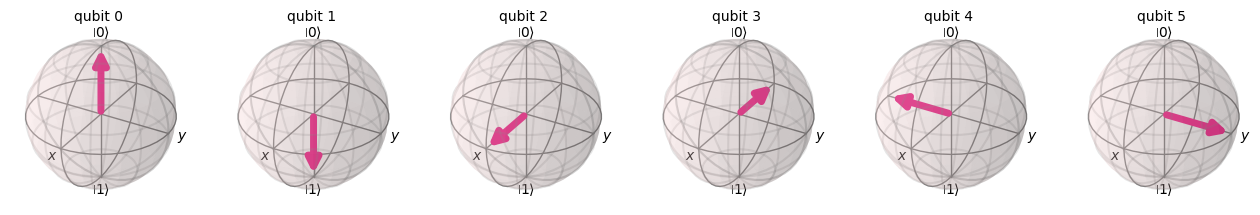

In [15]:
qc6 = QuantumCircuit(6)

#nothing on the 0 qubit

# qubit in vertical state
qc6.x(1)

# diagonal
qc6.h(2)

# anti diagonal
qc6.x(3)
qc6.h(3)
# qc6.h(3)
# qc6.z(3)

# right circular
qc6.h(4)
qc6.p(-np.pi/2, 4)

#left circular
qc6.h(5)
qc6.p(np.pi/2, 5)


# qobj = assemble(qc6)
# state = sim.run(qobj).result().get_statevector()
state = Statevector(qc6)
plot_bloch_multivector(state)

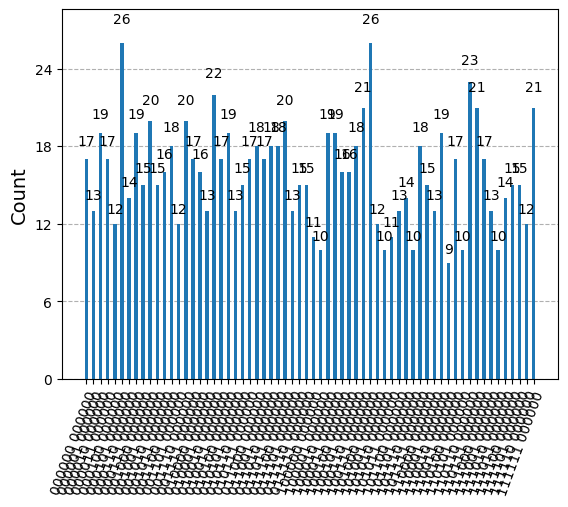

In [16]:
qc_aer = QuantumCircuit(6,6)
# qc1.h(0)
# qc.x(0)
# qc1.h(0)
# qc1.p(-np.pi/2, 0)
# qc1.draw('mpl')

for i in range(6):
    qc_aer.h(i)
qc_aer.measure_all()
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_aer).result()
#by default 1024 qubits are measured
counts = result.get_counts()
plot_histogram(counts)

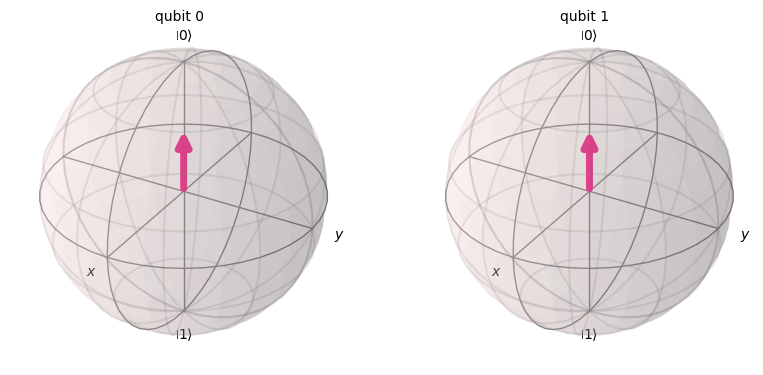

In [17]:
cluster2 = QuantumCircuit(2,2)
ent_c = QuantumCircuit(2,2)

for i in range(2):
    cluster2.h(i)

cluster2.cz(0,1)

# state = [np.sqrt(3)/2, 0, 0, 1/2]
# ent_c.initialize(state, [0,1])
# ent_c.draw('mpl')

ent_c.ry(2*(np.pi/6), 0)
ent_c.cx(0,1)

# ent_c.draw('mpl')
# cluster2.measure_all()
# sim = Aer.get_backend('aer_simulator')
# result = sim.run(cluster2).result()
# #by default 1024 qubits are measured
# counts = result.get_counts()
# plot_histogram(counts)

state = Statevector(ent_c)
plot_bloch_multivector(state)






In [18]:
# cluster4 = QuantumCircuit(4,4)

# for i in range(4):
#     cluster4.h(i)

# # for i in range

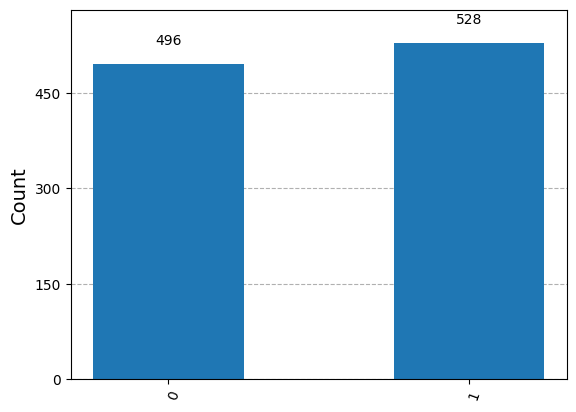

In [38]:
# measurement in x basis

def x_measurement(qc, qbit, cbit):
    qc.h(qbit)
    qc.measure(qbit, cbit)
    return qc

qc = QuantumCircuit(1, 1)

#right_circular
qc.h(0)
qc.p(-np.pi/2, 0)

qc_x_measurement = x_measurement(qc, 0, 0)

sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()

counts = result.get_counts()
plot_histogram(counts)

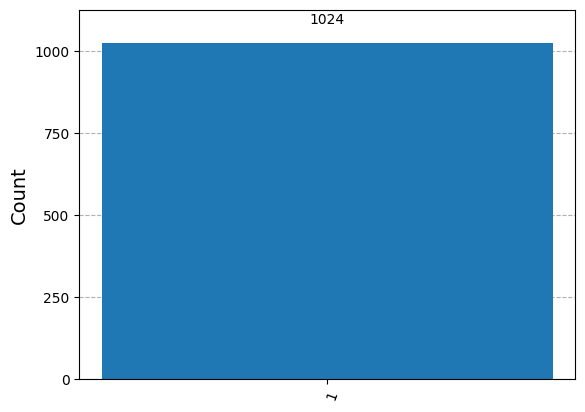

In [39]:
#meaurement in y basis
def y_measurement(qc, qbit, cbit):
    minus_pi = -np.pi
    qc.p(minus_pi/2, qbit)
    qc.h(qbit)
    qc.p(minus_pi/2, qbit)
    qc.measure(qbit, cbit)
    return qc


qc1 = QuantumCircuit(1, 1)

#right_circular
qc1.h(0)
qc1.p(-np.pi/2, 0)

qc_y_measurement = y_measurement(qc1, 0, 0)

sim = Aer.get_backend('aer_simulator')
result = sim.run(qc1).result()

counts = result.get_counts()
plot_histogram(counts)


In [58]:
from qiskit import QuantumCircuit, assemble, transpile
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, DensityMatrix

qc = QuantumCircuit(2)
qc.h(range(2))
sv = Statevector(qc)
# sv.draw("latex")
# array_to_latex(sv, prefix="\\text{Statevector} = ")


In [ ]:
svsim = Aer.get_backend("aer_simulator")
qc.save_statevector()
trasnpiled_qc = transpile(qc, svsim)    
final_state = svsim.run(trasnpiled_qc, shots = 1024).result().get_statevector()

array_to_latex(final_state, prefix="\\text{Statevector} = ")


QiskitError: 'You have to select a circuit or schedule when there is more than one available'

In [55]:
dm = DensityMatrix(qc)
array_to_latex(dm, prefix="\\text{Density Matrix} = ")


QiskitError: 'Cannot apply Instruction: save_statevector'

In [5]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit_aer import Aer


q = QuantumRegister(2,"q")
c = ClassicalRegister(2,"c")
qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.measure(q[0],c[0])
qc.h(q[1]).c_if(c,0)
qc.measure(q,c)
aer = Aer.get_backend('aer_simulator')
job = aer.run(qc,shots=1024)
counts = job.result().get_counts(qc)
print(counts)

{'01': 1024}
